### Analysis on the World Happiness Report

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Import the csv file of the happiness report 2019
data=pd.read_csv("C:/Users/astro/Desktop/Happiness Report Data/2019.csv")

In [54]:
data.head()

,Overall rank,Country,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [21]:
# Get the column names to check to standardise
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [28]:
# Rename columns
data.rename(columns= {"GDP per capita": "Economy","Score":"Happiness_Score","Healthy life expectancy":"Health", "Freedom to make life choices":"Freedom",
                     "Perceptions of corruption":"Trust","Social support":"Family", "Country or region":"Country"},inplace = True)

#### Basic Exploratory Data Analysis: 

In [55]:
# Get the number of null values (if present in the data)
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank       156 non-null int64
Country            156 non-null object
Happiness_Score    156 non-null float64
Economy            156 non-null float64
Family             156 non-null float64
Health             156 non-null float64
Freedom            156 non-null float64
Generosity         156 non-null float64
Trust              156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


In [30]:
# Get an estimate of the distribution of the data
data.describe()  

,Overall rank,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [29]:
data.head()

,Overall rank,Country,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [31]:
data.dtypes

Overall rank         int64
Country             object
Happiness_Score    float64
Economy            float64
Family             float64
Health             float64
Freedom            float64
Generosity         float64
Trust              float64
dtype: object

In [38]:
# Indicates values not defined in our data frame
data.isnull().sum()

Overall rank       0
Country            0
Happiness_Score    0
Economy            0
Family             0
Health             0
Freedom            0
Generosity         0
Trust              0
dtype: int64

#### Observation:

When it comes to data cleaning there were no issues faced as there were no missing values or records that were needed to be removed or added

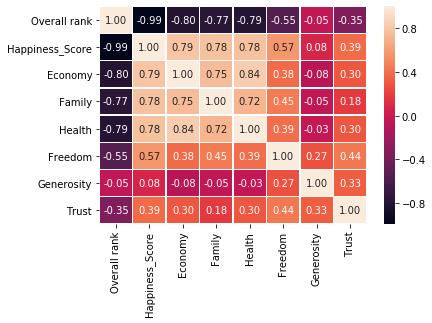

In [37]:
# Correlation map
# Display the negative and postive correlation between variables
data.corr

sns.heatmap(data.corr(), annot =True, linewidth =".5", fmt =".2f")
plt.show()


#figsize - image size
#data.corr() - Display positive and negative correlation between columns
#annot=True -shows correlation rates
#linewidths - determines the thickness of the lines in between
#cmap - determines the color tones we will use
#fmt - determines precision(Number of digits after 0)
#if the correlation between the two columns is close to 1 or 1, the correlation between the two columns has a positive ratio.
#if the correlation between the two columns is close to -1 or -1, the correlation between the two columns has a negative ratio.
#If it is close to 0 or 0 there is no relationship between them.

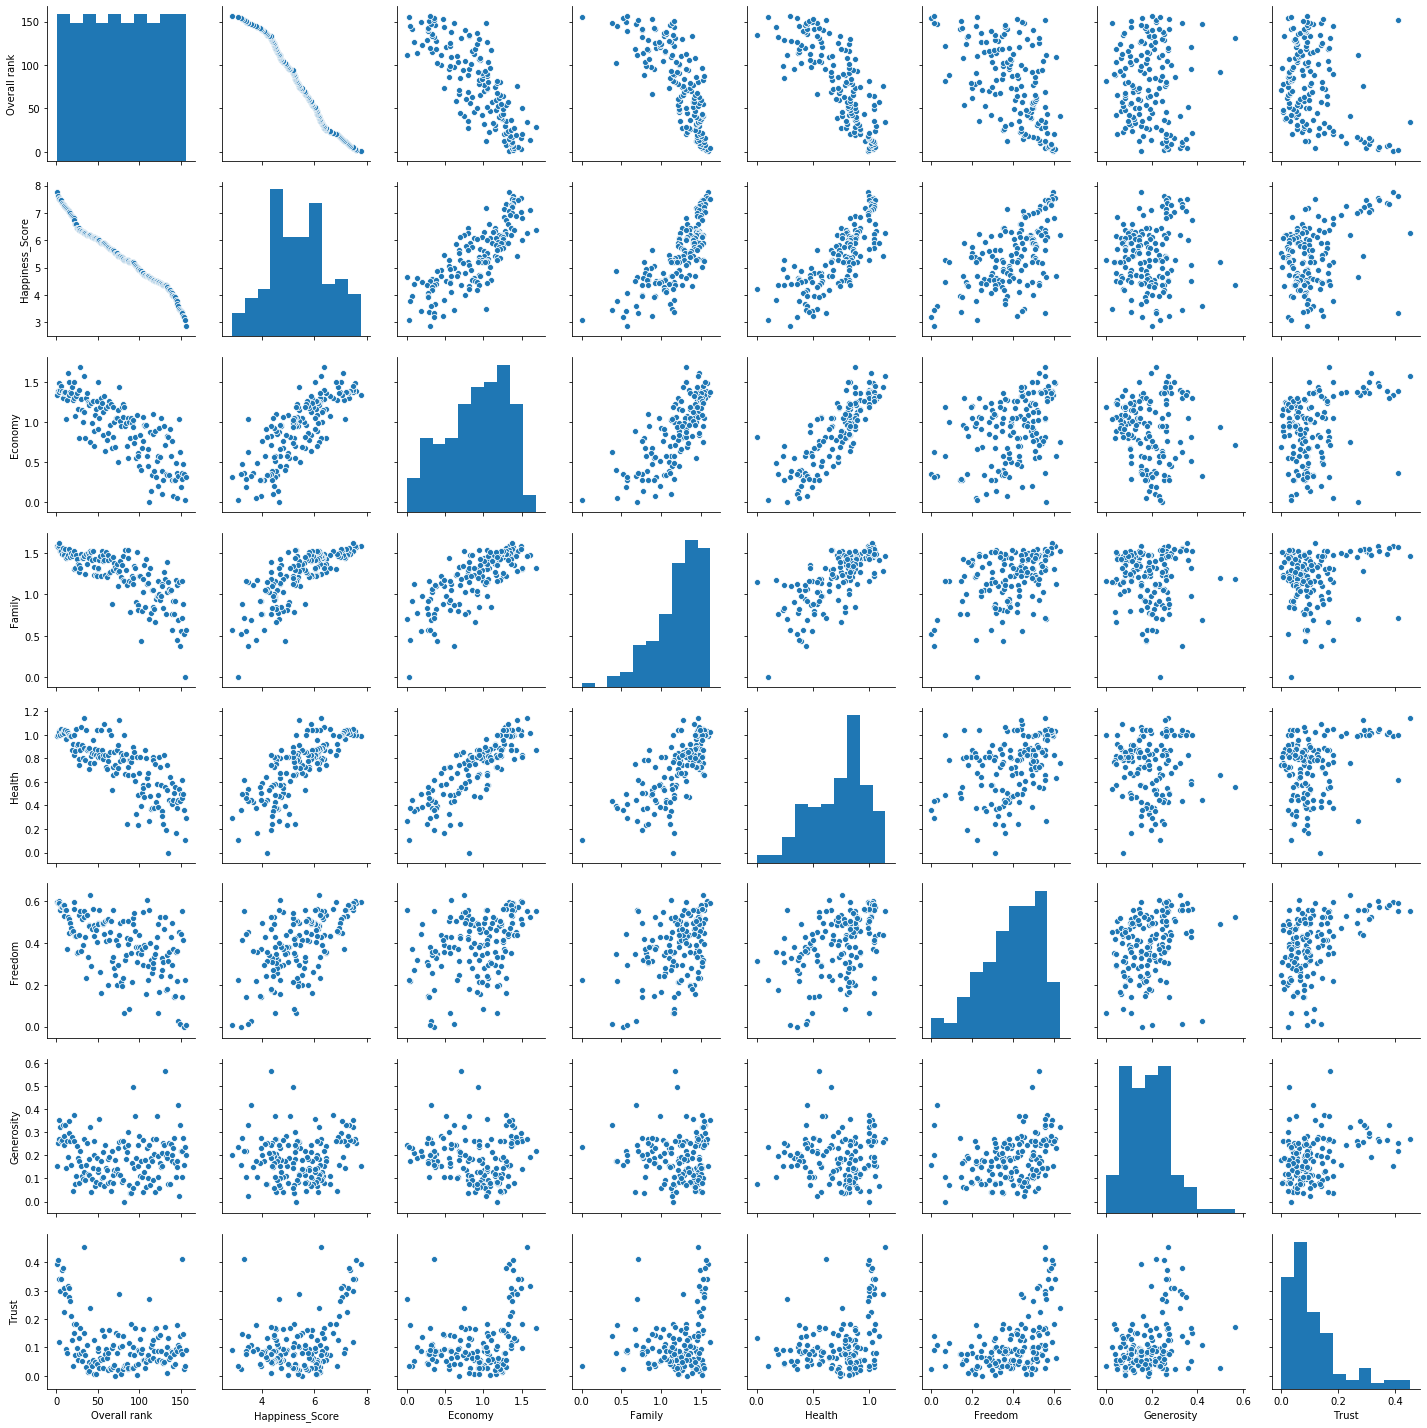

In [70]:
#Plot the factors against each other to get a better understanding of how the variables behave with each other
sns.pairplot(data)

The following observations can be made from the pairplot above:

    • As it can be seen there are multiple instances of strong correlations between (For example correlation between Happiness Score and Economy shows high correlation).


    • A trend that can be noted is from the family histogram, which is positively skewed indicating more frequent higher family rating, which implies most of the people taking the survey felt having a family does play an important role in determining happiness levels. 

    • The histogram for happiness score shows majority of the countries scored around the 4 to 7 range, implying majority of people are moderately satisfied with the lives they currently live. 

    • The same can be said for Trust, which seems to be negatively skewed, showing majority of people have little trust in their governments.


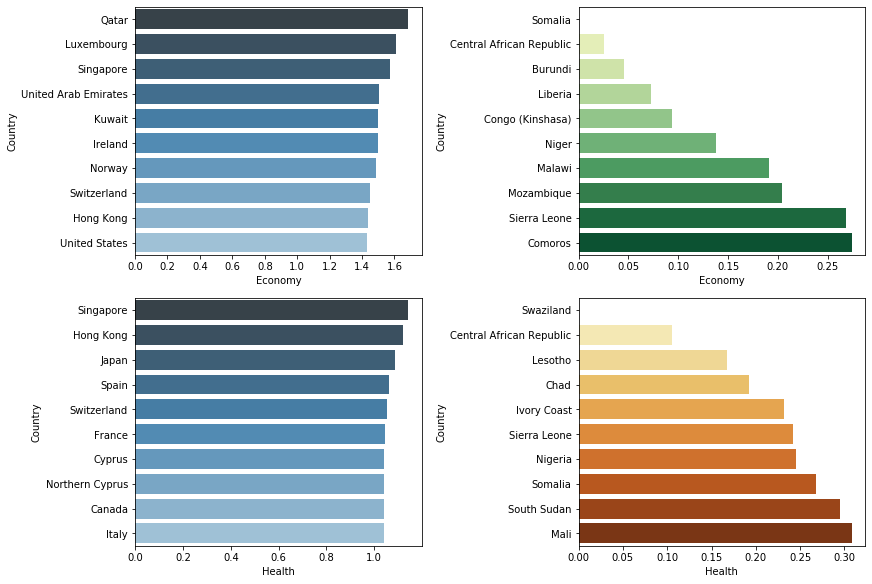

In [69]:
# Plot the top 10  and bottom 10 countries for factors like economy and Health
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy',y='Country',data=data.nlargest(10,'Economy'),ax=axes[0,0],palette="Blues_d")
sns.barplot(x='Economy',y='Country',data=data.nsmallest(10,'Economy'),ax=axes[0,1],palette="YlGn")

#sns.barplot(x='Family' ,y='Country',data=data.nlargest(10,'Family'),ax=axes[0,1],palette="YlGn")
sns.barplot(x='Health' ,y='Country',data=data.nlargest(10,'Health'),ax=axes[1,0],palette='Blues_d')
sns.barplot(x='Health' ,y='Country',data=data.nsmallest(10,'Health'),ax=axes[1,1],palette='YlOrBr')

#### Observations:

One can easily find out the significant difference in the factors between each of the regions for a particular year. Wealthy regions (Oceania or Western Countries) seem to have high values in nearly all the factors when compared to the poor countries (African Region) as seen on the right side of the plot.

In [49]:
# Shows the top ten countries ranked by their happiness scores
data.sort_values("Happiness_Score", ascending = False).head(10)

,Overall rank,Country,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [53]:
#Exporting the final dataframe to a csv file for further visualisation
data.to_csv("Happiness_Report_2019.csv",index=False)

### Additional Visualisation:

After performing basic data cleaning and exploratory data analysis on the data, the exported dataframe was then visualised using Tableau to get a more enhanced and interactive experience with getting insights on the data.

The visualisation can be found at the below link:<br>
https://public.tableau.com/profile/am1612#!/vizhome/WorldHapinessReport_15890778885510/Story1


### References:

1.	https://www.youtube.com/watch?v=jbkSRLYSojo
2.	https://en.wikipedia.org/wiki/World_Happiness_Report
3.	https://www.euronews.com/2020/03/20/world-happiness-finland-takes-top-ranking-for-third-year-in-a-row
